center of mass for a system of particles
---

$R=\frac{1}{M}\sum_{i=1}^n{m_i r_i}$

- R: center of mass
- M: sum of all masses

angular momentum 
---

$L=r\times p=m r\times v$

In [108]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
if 0:
    r_3d,m1,m2,x,y,z,vx,vy,vz,v_r,v_theta,v_phi=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35,36,37,38), unpack=True)
else:
    r_3d,m1,m2,x,y,z,vx,vy,vz,v_r,v_theta,v_phi=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35,36,37,38), unpack=True)

In [110]:
m_ges=m1+m2
r_vec=np.array([[x],[y],[z]])

In [111]:
#calculate the center of mass R with different distances
R_dist=np.sum(m_ges*r_3d)/np.sum(m_ges)
R_vec=np.sum(m_ges*r_vec)/np.sum(m_ges) #berechnet am ende Rx+Ry+Rz als Absolutwert, also falsch
R_x=np.sum(m_ges*x)/np.sum(m_ges)
R_y=np.sum(m_ges*y)/np.sum(m_ges)
R_z=np.sum(m_ges*z)/np.sum(m_ges)
R_vector=np.array([[R_x],[R_y],[R_z]])
R_vecabs=np.sqrt(R_x**2+R_y**2+R_z**2)

In [112]:
print('R_abs='+str(R_dist), 'R_vector='+str(R_vector), 'R_absvector='+str(R_vecabs))

('R_abs=5.94502430145', 'R_vector=[[-0.00880153]\n [ 0.00221846]\n [-0.00226683]]', 'R_absvector=0.00935559154689')


In [113]:
print(x[0],y[0],z[0], r_3d[0])
#the center of mass is neither (0,0,0) nor the position of the black hole 

(6.8038099999999995e-05, 0.00020285600000000001, 4.4800499999999999e-05, 0.00021860200000000001)


In [114]:
#calculate momentum of components
p_x=m_ges*vx
p_y=m_ges*vy
p_z=m_ges*vz

#calculate momentum of spherical components 
p_r=m_ges*v_r
p_theta=m_ges*v_theta
p_phi=m_ges*v_phi

theta=np.arcsin(z/r_3d)
phi=np.arctan2(y,x)

#calculate the angular momentum in kartesian coordinates
L_kart=np.zeros([3,len(x)])
L_kart.shape=(len(x),3)
for n in range(len(x)):
    L_kart[n]=np.cross([x[n],y[n],z[n]],[p_x[n],p_y[n],p_z[n]])
    
#calculate angular momentum in polar coordinates
L_pol=np.zeros([len(x),3])
for n in range(len(x)):
    L_pol[n]=np.cross([r_3d[n],theta[n],phi[n]],[p_r[n],p_theta[n],p_phi[n]])

In [115]:
L_pol

array([[  1.12367181e+05,  -2.77247110e+03,   4.39135513e+02],
       [  1.00783530e+02,   1.37171108e+02,   6.74602710e+01],
       [  5.18194232e+02,   1.84729276e+02,  -8.36660775e+01],
       ..., 
       [  8.65188840e-02,   1.42294919e+01,   1.75191878e+01],
       [ -3.47948114e-01,  -3.35408953e+01,   1.98201600e+01],
       [ -1.21312392e+00,  -4.95966989e+00,   5.63498034e+01]])

In [116]:
L_kart

array([[ 19.04631292,  -6.02476491,  -1.64541093],
       [  0.19794901,  -0.10107877,  -0.05550559],
       [  0.52470992,  -0.26923049,  -0.12142138],
       ..., 
       [ -1.31586139,  18.21272306, -13.26664178],
       [ 11.14000398, -24.4939787 ,  27.55302634],
       [-50.19217417, -26.71148352,   1.03060199]])

In [117]:
L_1_kart=L_kart[:,0]
L_2_kart=L_kart[:,1]
L_3_kart=L_kart[:,2]
L_1_pol=L_pol[:,0] #entspricht das L_r?
L_2_pol=L_pol[:,1] #entspricht das L_theta?
L_3_pol=L_pol[:,2] #entspricht das L_phi?

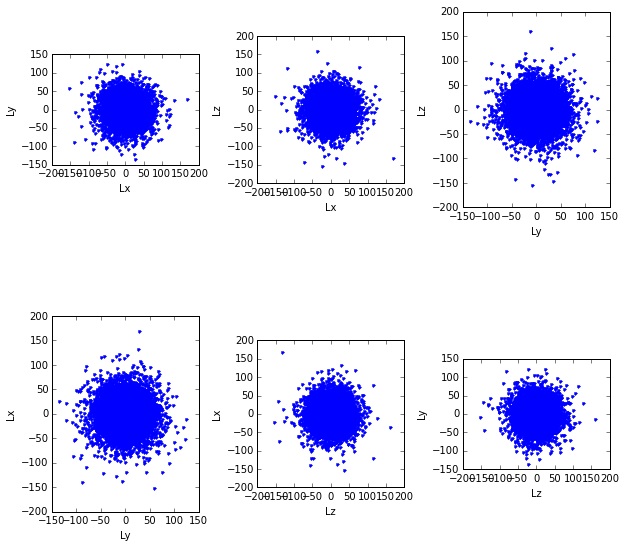

In [118]:
#kartesian coordinates
fig,axes=plt.subplots(nrows=2,ncols=3, figsize=(10,10))
axes[0,0].plot(L_1_kart,L_2_kart,'.')
axes[0,0].set_xlabel('Lx')
axes[0,0].set_ylabel('Ly')
axes[0,1].plot(L_1_kart,L_3_kart,'.')
axes[0,1].set_xlabel('Lx')
axes[0,1].set_ylabel('Lz')
axes[0,2].plot(L_2_kart,L_3_kart,'.')
axes[0,2].set_xlabel('Ly')
axes[0,2].set_ylabel('Lz')
axes[1,0].plot(L_2_kart,L_1_kart,'.')
axes[1,0].set_xlabel('Ly')
axes[1,0].set_ylabel('Lx')
axes[1,1].plot(L_3_kart,L_1_kart,'.')
axes[1,1].set_xlabel('Lz')
axes[1,1].set_ylabel('Lx')
axes[1,2].plot(L_3_kart,L_2_kart,'.')
axes[1,2].set_xlabel('Lz')
axes[1,2].set_ylabel('Ly')
axes[0,0].set_aspect('equal')
axes[0,1].set_aspect('equal')
axes[0,2].set_aspect('equal')
axes[1,0].set_aspect('equal')
axes[1,1].set_aspect('equal')
axes[1,2].set_aspect('equal')
fig.subplots_adjust(wspace=0.4)


In [119]:
print(np.max(L_1_pol),np.max(L_2_pol),np.max(L_3_pol),np.min(L_1_pol),np.min(L_2_pol),np.min(L_3_pol))

(112367.18134405879, 200.70441642223247, 439.13551262133899, -172.88385878441923, -2772.4711044327005, -135.95696138156853)


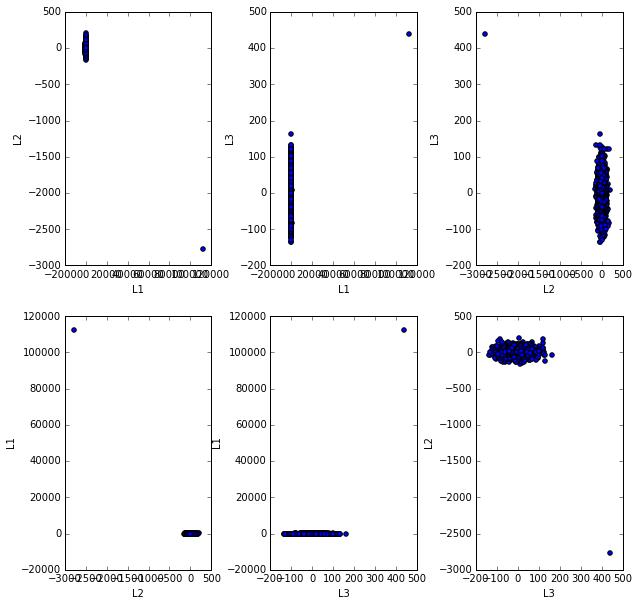

In [120]:
#spherical coordinates
fig,axes=plt.subplots(nrows=2,ncols=3, figsize=(10,10))
axes[0,0].scatter(L_1_pol,L_2_pol)
axes[0,0].set_xlabel('L1')
axes[0,0].set_ylabel('L2')
axes[0,1].scatter(L_1_pol,L_3_pol)
axes[0,1].set_xlabel('L1')
axes[0,1].set_ylabel('L3')
axes[0,2].scatter(L_2_pol,L_3_pol)
axes[0,2].set_xlabel('L2')
axes[0,2].set_ylabel('L3')
axes[1,0].scatter(L_2_pol,L_1_pol)
axes[1,0].set_xlabel('L2')
axes[1,0].set_ylabel('L1')
axes[1,1].scatter(L_3_pol,L_1_pol)
axes[1,1].set_xlabel('L3')
axes[1,1].set_ylabel('L1')
axes[1,2].scatter(L_3_pol,L_2_pol)
axes[1,2].set_xlabel('L3')
axes[1,2].set_ylabel('L2')
#axes[0,0].set_aspect('equal')
#axes[0,1].set_aspect('equal')
#axes[0,2].set_aspect('equal')
#axes[1,0].set_aspect('equal')
#axes[1,1].set_aspect('equal')
#axes[1,2].set_aspect('equal')
fig.subplots_adjust(wspace=0.4)

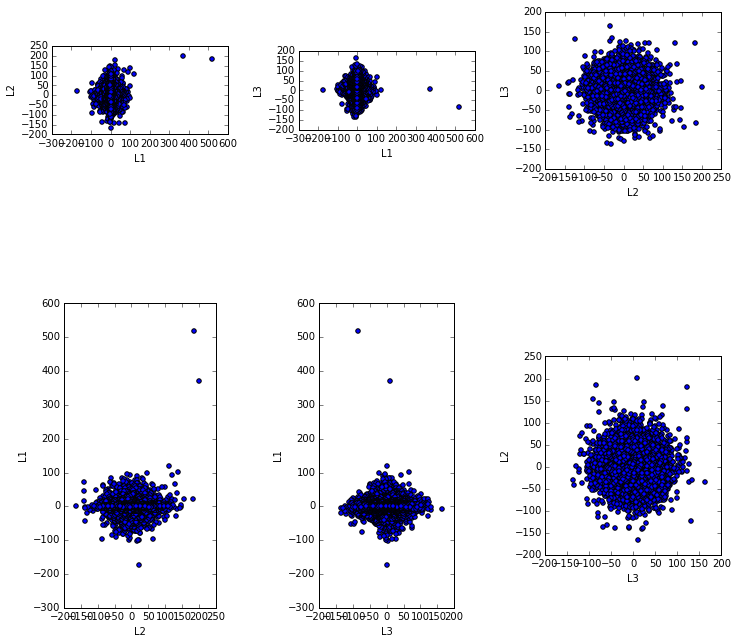

In [121]:
#spherical coordinates
#exclude angular momentum of bh
fig,axes=plt.subplots(nrows=2,ncols=3, figsize=(12,12))
axes[0,0].scatter(L_1_pol[1:],L_2_pol[1:])
axes[0,0].set_xlabel('L1')
axes[0,0].set_ylabel('L2')
axes[0,1].scatter(L_1_pol[1:],L_3_pol[1:])
axes[0,1].set_xlabel('L1')
axes[0,1].set_ylabel('L3')
axes[0,2].scatter(L_2_pol[1:],L_3_pol[1:])
axes[0,2].set_xlabel('L2')
axes[0,2].set_ylabel('L3')
axes[1,0].scatter(L_2_pol[1:],L_1_pol[1:])
axes[1,0].set_xlabel('L2')
axes[1,0].set_ylabel('L1')
axes[1,1].scatter(L_3_pol[1:],L_1_pol[1:])
axes[1,1].set_xlabel('L3')
axes[1,1].set_ylabel('L1')
axes[1,2].scatter(L_3_pol[1:],L_2_pol[1:])
axes[1,2].set_xlabel('L3')
axes[1,2].set_ylabel('L2')
axes[0,0].set_aspect('equal')
axes[0,1].set_aspect('equal')
axes[0,2].set_aspect('equal')
axes[1,0].set_aspect('equal')
axes[1,1].set_aspect('equal')
axes[1,2].set_aspect('equal')
fig.subplots_adjust(wspace=0.4)


In [122]:
#if L2=L_theta and L3=L_phi then there shouldn't be a bulk rotation

sectional densitiy profiles
---

In [123]:
#in Scheiben um Achsen um  center of mass punkt 
x0=R_vector[0] #x component of center of mass
y0=R_vector[1] #y component of center of mass
z0=R_vector[2] #z component of center of mass

d=1 #kpc; just chose a random value

xy_level=np.array([[x],[y],[z[np.abs(z-z0)<=d]]])
xz_level=np.array([[x],[y[np.abs(y-y0)<=d]],[z]])
yz_level=np.array([[x[np.abs(x-x0)<=d]],[y],[z]])

In [124]:
m_xy=m_ges[np.abs(z-z0)<=d]
m_xz=m_ges[np.abs(y-y0)<=d]
m_yz=m_ges[np.abs(x-x0)<=d]
print(len(m_xy),len(m_xz), len(m_yz))
print(np.sum(m_xy),np.sum(m_xz),np.sum(m_yz))

(273321, 273609, 273693)
(108177.27849816001, 108209.49136476997, 108251.82628042002)


Die Massen der Sterne unterscheiden sich bei 0.5 kpc um 1/1000, bei 1kpc sogar noch weniger.

In [125]:
#splitting in octants
x_new=x-x0
y_new=y-y0
z_new=z-z0

x_pos=np.ma.getmask(np.ma.masked_greater_equal(x_new, 0))
x_neg=np.ma.getmask(np.ma.masked_less_equal(x_new, 0))
y_pos=np.ma.getmask(np.ma.masked_greater_equal(y_new, 0))
y_neg=np.ma.getmask(np.ma.masked_less_equal(y_new, 0))
z_pos=np.ma.getmask(np.ma.masked_greater_equal(z_new, 0))
z_neg=np.ma.getmask(np.ma.masked_less_equal(z_new, 0))

oct1=r_3d[x_pos*y_pos*z_pos]
oct2=r_3d[x_neg*y_pos*z_pos]
oct3=r_3d[x_neg*y_neg*z_pos]
oct4=r_3d[x_pos*y_neg*z_pos]
oct5=r_3d[x_pos*y_pos*z_neg]
oct6=r_3d[x_neg*y_pos*z_neg]
oct7=r_3d[x_neg*y_neg*z_neg]
oct8=r_3d[x_pos*y_neg*z_neg]




In [126]:
#density profiles of octants
r0=0.01
step=30
end=100
stepsize=((np.log10(end)-np.log10(r0))/step)

r=np.logspace(np.log10(r0),np.log10(end),step+1)
r_i=r[:-1:]
r_a=r[1::]

In [127]:
#calculates mean distance of bin
x1_new=np.zeros(step)
x2_new=np.zeros(step)
x3_new=np.zeros(step)
x4_new=np.zeros(step)
x5_new=np.zeros(step)
x6_new=np.zeros(step)
x7_new=np.zeros(step)
x8_new=np.zeros(step)
y1_new=np.zeros(step)
y2_new=np.zeros(step)
y3_new=np.zeros(step)
y4_new=np.zeros(step)
y5_new=np.zeros(step)
y6_new=np.zeros(step)
y7_new=np.zeros(step)
y8_new=np.zeros(step)
z1_new=np.zeros(step)
z2_new=np.zeros(step)
z3_new=np.zeros(step)
z4_new=np.zeros(step)
z5_new=np.zeros(step)
z6_new=np.zeros(step)
z7_new=np.zeros(step)
z8_new=np.zeros(step)

M1=np.zeros(step)
M2=np.zeros(step)
M3=np.zeros(step)
M4=np.zeros(step)
M5=np.zeros(step)
M6=np.zeros(step)
M7=np.zeros(step)
M8=np.zeros(step)
rho1=np.zeros(step)
rho2=np.zeros(step)
rho3=np.zeros(step)
rho4=np.zeros(step)
rho5=np.zeros(step)
rho6=np.zeros(step)
rho7=np.zeros(step)
rho8=np.zeros(step)


for n in range(step):
    inbin=(r_i[n]<r_3d) * (r_3d<=r_a[n]) #r_3d wird verwendet! creates boolean arrays woth true values if star is in bin distance
    M1[n]=np.sum(m1[inbin*x_pos*y_pos*z_pos])+np.sum(m2[inbin*x_pos*y_pos*z_pos]) #mass array with both masses of binary system
    M2[n]=np.sum(m1[inbin*x_neg*y_pos*z_pos])+np.sum(m2[inbin*x_neg*y_pos*z_pos])
    M3[n]=np.sum(m1[inbin*x_neg*y_neg*z_pos])+np.sum(m2[inbin*x_neg*y_neg*z_pos])
    M4[n]=np.sum(m1[inbin*x_pos*y_neg*z_pos])+np.sum(m2[inbin*x_pos*y_neg*z_pos])
    M5[n]=np.sum(m1[inbin*x_pos*y_pos*z_neg])+np.sum(m2[inbin*x_pos*y_pos*z_neg])
    M6[n]=np.sum(m1[inbin*x_neg*y_pos*z_neg])+np.sum(m2[inbin*x_neg*y_pos*z_neg])
    M7[n]=np.sum(m1[inbin*x_neg*y_neg*z_neg])+np.sum(m2[inbin*x_neg*y_neg*z_neg])
    M8[n]=np.sum(m1[inbin*x_pos*y_neg*z_neg])+np.sum(m2[inbin*x_pos*y_neg*z_neg])
    rho1[n]=M1[n]/((r_a[n]**2-r_i[n]**2)*np.pi) #calculates density of bin
    rho2[n]=M2[n]/((r_a[n]**2-r_i[n]**2)*np.pi)
    rho3[n]=M3[n]/((r_a[n]**2-r_i[n]**2)*np.pi)
    rho4[n]=M4[n]/((r_a[n]**2-r_i[n]**2)*np.pi)
    rho5[n]=M5[n]/((r_a[n]**2-r_i[n]**2)*np.pi)
    rho6[n]=M6[n]/((r_a[n]**2-r_i[n]**2)*np.pi)
    rho7[n]=M7[n]/((r_a[n]**2-r_i[n]**2)*np.pi)
    rho8[n]=M8[n]/((r_a[n]**2-r_i[n]**2)*np.pi)
    x1_new[n]=np.mean(x_new[inbin*x_pos*y_pos*z_pos]) #calculates mean distance of bin
    x2_new[n]=np.mean(x_new[inbin*x_neg*y_pos*z_pos])
    x3_new[n]=np.mean(x_new[inbin*x_neg*y_neg*z_pos])
    x4_new[n]=np.mean(x_new[inbin*x_pos*y_neg*z_pos])
    x5_new[n]=np.mean(x_new[inbin*x_pos*y_pos*z_neg])
    x6_new[n]=np.mean(x_new[inbin*x_neg*y_pos*z_neg])
    x7_new[n]=np.mean(x_new[inbin*x_neg*y_neg*z_neg])
    x8_new[n]=np.mean(x_new[inbin*x_pos*y_neg*z_neg])
    y1_new[n]=np.mean(y_new[inbin*x_pos*y_pos*z_pos]) 
    y2_new[n]=np.mean(y_new[inbin*x_neg*y_pos*z_pos])
    y3_new[n]=np.mean(y_new[inbin*x_neg*y_neg*z_pos])
    y4_new[n]=np.mean(y_new[inbin*x_pos*y_neg*z_pos])
    y5_new[n]=np.mean(y_new[inbin*x_pos*y_pos*z_neg])
    y6_new[n]=np.mean(y_new[inbin*x_neg*y_pos*z_neg])
    y7_new[n]=np.mean(y_new[inbin*x_neg*y_neg*z_neg])
    y8_new[n]=np.mean(y_new[inbin*x_pos*y_neg*z_neg])
    z1_new[n]=np.mean(z_new[inbin*x_pos*y_pos*z_pos]) 
    z2_new[n]=np.mean(z_new[inbin*x_neg*y_pos*z_pos])
    z3_new[n]=np.mean(z_new[inbin*x_neg*y_neg*z_pos])
    z4_new[n]=np.mean(z_new[inbin*x_pos*y_neg*z_pos])
    z5_new[n]=np.mean(z_new[inbin*x_pos*y_pos*z_neg])
    z6_new[n]=np.mean(z_new[inbin*x_neg*y_pos*z_neg])
    z7_new[n]=np.mean(z_new[inbin*x_neg*y_neg*z_neg])
    z8_new[n]=np.mean(z_new[inbin*x_pos*y_neg*z_neg])

In [128]:
#extrabin am anfang
r_anf=r_3d<r0
M1_extra=np.sum(m1[r_anf*x_pos*y_pos*z_pos])+np.sum(m2[r_anf*x_pos*y_pos*z_pos])
M2_extra=np.sum(m1[r_anf*x_neg*y_pos*z_pos])+np.sum(m2[r_anf*x_neg*y_pos*z_pos])
M3_extra=np.sum(m1[r_anf*x_neg*y_neg*z_pos])+np.sum(m2[r_anf*x_neg*y_neg*z_pos])
M4_extra=np.sum(m1[r_anf*x_pos*y_neg*z_pos])+np.sum(m2[r_anf*x_pos*y_neg*z_pos])
M5_extra=np.sum(m1[r_anf*x_pos*y_pos*z_neg])+np.sum(m2[r_anf*x_pos*y_pos*z_neg])
M6_extra=np.sum(m1[r_anf*x_neg*y_pos*z_neg])+np.sum(m2[r_anf*x_neg*y_pos*z_neg])
M7_extra=np.sum(m1[r_anf*x_neg*y_neg*z_neg])+np.sum(m2[r_anf*x_neg*y_neg*z_neg])
M8_extra=np.sum(m1[r_anf*x_pos*y_neg*z_neg])+np.sum(m2[r_anf*x_pos*y_neg*z_neg])
rho1_extra=M1_extra/(r0**2*np.pi)
rho2_extra=M2_extra/(r0**2*np.pi)
rho3_extra=M3_extra/(r0**2*np.pi)
rho4_extra=M4_extra/(r0**2*np.pi)
rho5_extra=M5_extra/(r0**2*np.pi)
rho6_extra=M6_extra/(r0**2*np.pi)
rho7_extra=M7_extra/(r0**2*np.pi)
rho8_extra=M8_extra/(r0**2*np.pi)
x1_extra=np.mean(x_new[r_anf*x_pos*y_pos*z_pos])
x2_extra=np.mean(x_new[r_anf*x_neg*y_pos*z_pos])
x3_extra=np.mean(x_new[r_anf*x_neg*y_neg*z_pos])
x4_extra=np.mean(x_new[r_anf*x_pos*y_neg*z_pos])
x5_extra=np.mean(x_new[r_anf*x_pos*y_pos*z_neg])
x6_extra=np.mean(x_new[r_anf*x_neg*y_pos*z_neg])
x7_extra=np.mean(x_new[r_anf*x_neg*y_neg*z_neg])
x8_extra=np.mean(x_new[r_anf*x_pos*y_neg*z_neg])
y1_extra=np.mean(y_new[r_anf*x_pos*y_pos*z_pos])
y2_extra=np.mean(y_new[r_anf*x_neg*y_pos*z_pos])
y3_extra=np.mean(y_new[r_anf*x_neg*y_neg*z_pos])
y4_extra=np.mean(y_new[r_anf*x_pos*y_neg*z_pos])
y5_extra=np.mean(y_new[r_anf*x_pos*y_pos*z_neg])
y6_extra=np.mean(y_new[r_anf*x_neg*y_pos*z_neg])
y7_extra=np.mean(y_new[r_anf*x_neg*y_neg*z_neg])
y8_extra=np.mean(y_new[r_anf*x_pos*y_neg*z_neg])
z1_extra=np.mean(z_new[r_anf*x_pos*y_pos*z_pos])
z2_extra=np.mean(z_new[r_anf*x_neg*y_pos*z_pos])
z3_extra=np.mean(z_new[r_anf*x_neg*y_neg*z_pos])
z4_extra=np.mean(z_new[r_anf*x_pos*y_neg*z_pos])
z5_extra=np.mean(z_new[r_anf*x_pos*y_pos*z_neg])
z6_extra=np.mean(z_new[r_anf*x_neg*y_pos*z_neg])
z7_extra=np.mean(z_new[r_anf*x_neg*y_neg*z_neg])
z8_extra=np.mean(z_new[r_anf*x_pos*y_neg*z_neg])

#einfuegen in bereits angefertigte arrays an erster Stelle
M1_final=np.insert(M1,0,M1_extra)
M2_final=np.insert(M2,0,M2_extra)
M3_final=np.insert(M3,0,M3_extra)
M4_final=np.insert(M4,0,M4_extra)
M5_final=np.insert(M5,0,M5_extra)
M6_final=np.insert(M6,0,M6_extra)
M7_final=np.insert(M7,0,M7_extra)
M8_final=np.insert(M8,0,M8_extra)
rho1_final=np.insert(rho1,0,rho1_extra)
rho2_final=np.insert(rho2,0,rho2_extra)
rho3_final=np.insert(rho3,0,rho3_extra)
rho4_final=np.insert(rho4,0,rho4_extra)
rho5_final=np.insert(rho5,0,rho5_extra)
rho6_final=np.insert(rho6,0,rho6_extra)
rho7_final=np.insert(rho7,0,rho7_extra)
rho8_final=np.insert(rho8,0,rho8_extra)
x1_final=np.insert(x1_new,0,x1_extra)
x2_final=np.insert(x2_new,0,x2_extra)
x3_final=np.insert(x3_new,0,x3_extra)
x4_final=np.insert(x4_new,0,x4_extra)
x5_final=np.insert(x5_new,0,x5_extra)
x6_final=np.insert(x6_new,0,x6_extra)
x7_final=np.insert(x7_new,0,x7_extra)
x8_final=np.insert(x8_new,0,x8_extra)
y1_final=np.insert(y1_new,0,y1_extra)
y2_final=np.insert(y2_new,0,y2_extra)
y3_final=np.insert(y3_new,0,y3_extra)
y4_final=np.insert(y4_new,0,y4_extra)
y5_final=np.insert(y5_new,0,y5_extra)
y6_final=np.insert(y6_new,0,y6_extra)
y7_final=np.insert(y7_new,0,y7_extra)
y8_final=np.insert(y8_new,0,y8_extra)
z1_final=np.insert(z1_new,0,z1_extra)
z2_final=np.insert(z2_new,0,z2_extra)
z3_final=np.insert(z3_new,0,z3_extra)
z4_final=np.insert(z4_new,0,z4_extra)
z5_final=np.insert(z5_new,0,z5_extra)
z6_final=np.insert(z6_new,0,z6_extra)
z7_final=np.insert(z7_new,0,z7_extra)
z8_final=np.insert(z8_new,0,z8_extra)


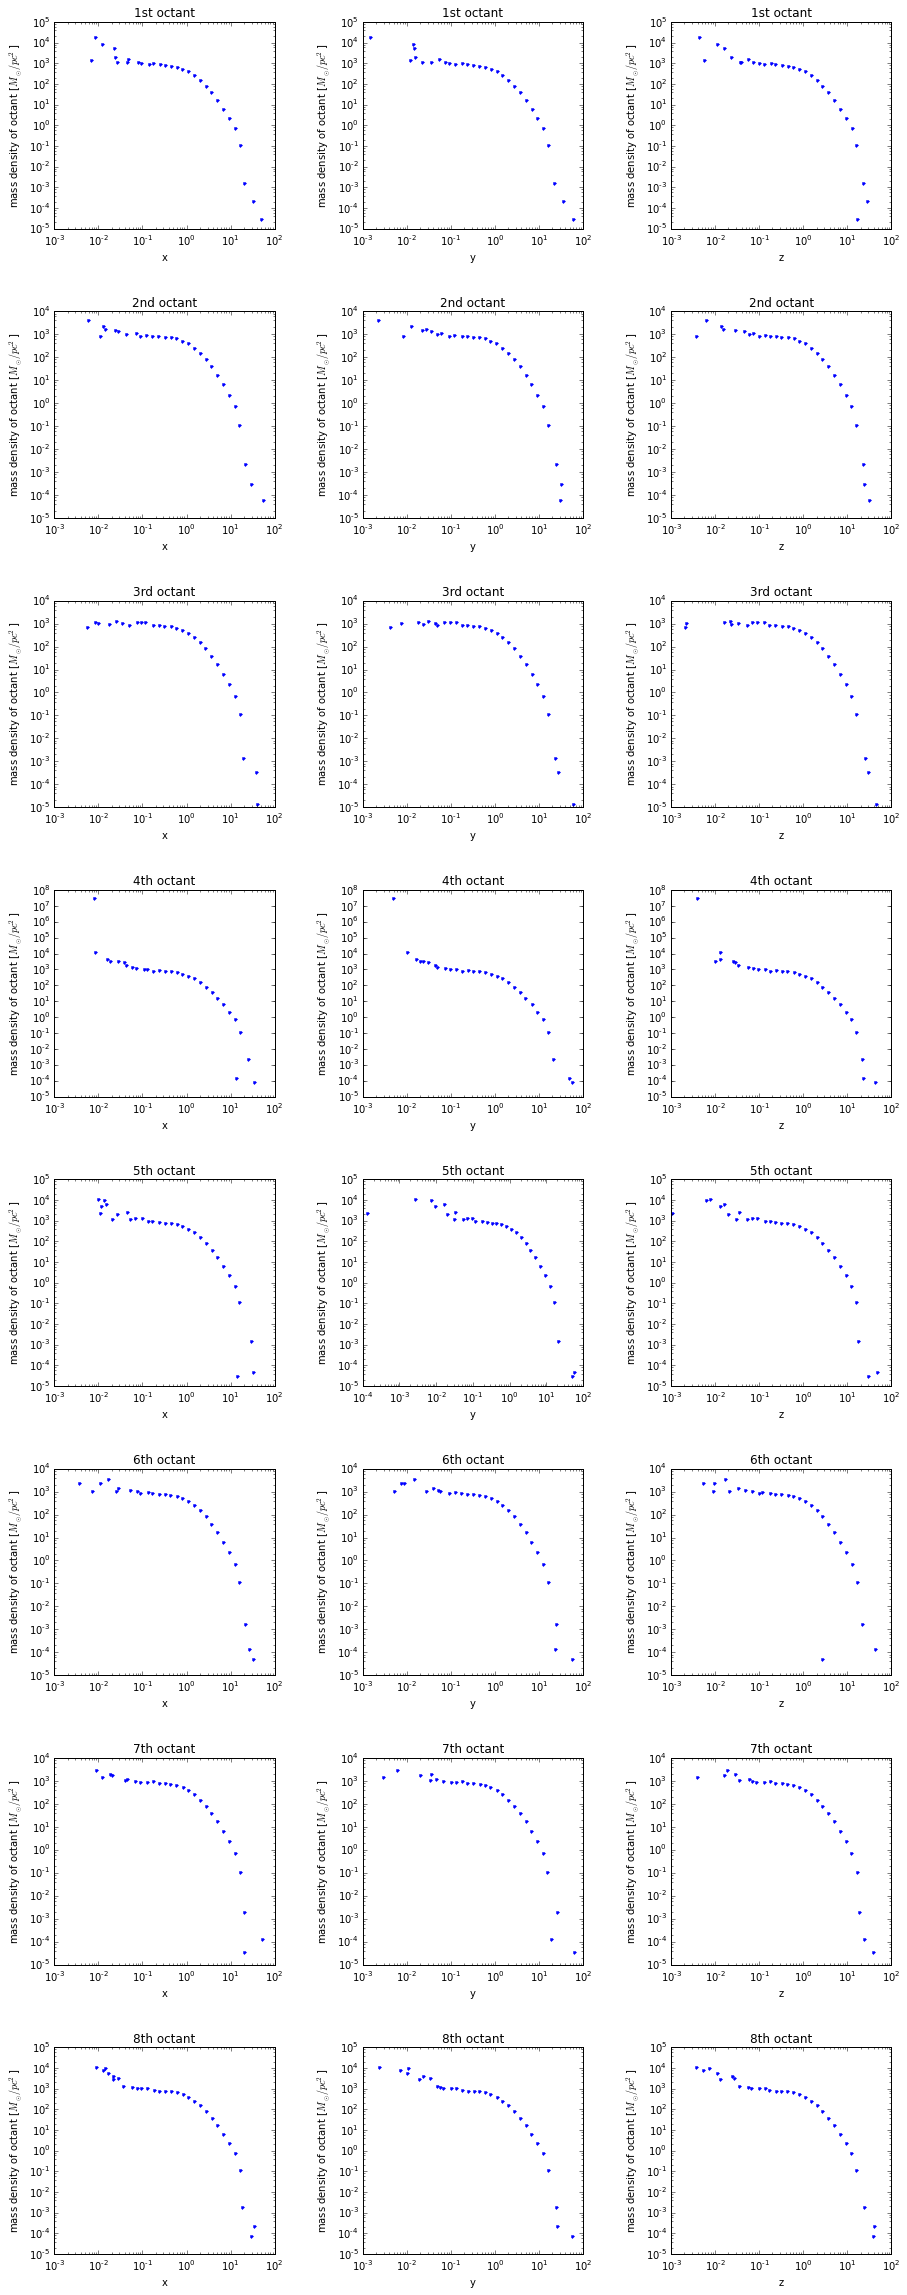

In [129]:
fig,axes=plt.subplots(nrows=8,ncols=3, figsize=(15,40))
axes[0,0].loglog(np.abs(x1_final),rho1_final,'.')
axes[0,0].set_xlabel('x')
axes[0,0].set_ylabel('mass density of octant [$M_\odot/pc^2$]')
axes[0,0].set_title('1st octant')
axes[0,1].loglog(np.abs(y1_final),rho1_final,'.')
axes[0,1].set_xlabel('y')
axes[0,1].set_ylabel('mass density of octant [$M_\odot/pc^2$]')
axes[0,1].set_title('1st octant')
axes[0,2].loglog(np.abs(z1_final),rho1_final,'.')
axes[0,2].set_xlabel('z')
axes[0,2].set_ylabel('mass density of octant [$M_\odot/pc^2$]')
axes[0,2].set_title('1st octant')

axes[1,0].loglog(np.abs(x2_final),rho2_final,'.')
axes[1,0].set_xlabel('x')
axes[1,0].set_ylabel('mass density of octant [$M_\odot/pc^2$]')
axes[1,0].set_title('2nd octant')
axes[1,1].loglog(np.abs(y2_final),rho2_final,'.')
axes[1,1].set_xlabel('y')
axes[1,1].set_ylabel('mass density of octant [$M_\odot/pc^2$]')
axes[1,1].set_title('2nd octant')
axes[1,2].loglog(np.abs(z2_final),rho2_final,'.')
axes[1,2].set_xlabel('z')
axes[1,2].set_ylabel('mass density of octant [$M_\odot/pc^2$]')
axes[1,2].set_title('2nd octant')

axes[2,0].loglog(np.abs(x3_final),rho3_final,'.')
axes[2,0].set_xlabel('x')
axes[2,0].set_ylabel('mass density of octant [$M_\odot/pc^2$]')
axes[2,0].set_title('3rd octant')
axes[2,1].loglog(np.abs(y3_final),rho3_final,'.')
axes[2,1].set_xlabel('y')
axes[2,1].set_ylabel('mass density of octant [$M_\odot/pc^2$]')
axes[2,1].set_title('3rd octant')
axes[2,2].loglog(np.abs(z3_final),rho3_final,'.')
axes[2,2].set_xlabel('z')
axes[2,2].set_ylabel('mass density of octant [$M_\odot/pc^2$]')
axes[2,2].set_title('3rd octant')

axes[3,0].loglog(np.abs(x4_final),rho4_final,'.')
axes[3,0].set_xlabel('x')
axes[3,0].set_ylabel('mass density of octant [$M_\odot/pc^2$]')
axes[3,0].set_title('4th octant')
axes[3,1].loglog(np.abs(y4_final),rho4_final,'.')
axes[3,1].set_xlabel('y')
axes[3,1].set_ylabel('mass density of octant [$M_\odot/pc^2$]')
axes[3,1].set_title('4th octant')
axes[3,2].loglog(np.abs(z4_final),rho4_final,'.')
axes[3,2].set_xlabel('z')
axes[3,2].set_ylabel('mass density of octant [$M_\odot/pc^2$]')
axes[3,2].set_title('4th octant')

axes[4,0].loglog(np.abs(x5_final),rho5_final,'.')
axes[4,0].set_xlabel('x')
axes[4,0].set_ylabel('mass density of octant [$M_\odot/pc^2$]')
axes[4,0].set_title('5th octant')
axes[4,1].loglog(np.abs(y5_final),rho5_final,'.')
axes[4,1].set_xlabel('y')
axes[4,1].set_ylabel('mass density of octant [$M_\odot/pc^2$]')
axes[4,1].set_title('5th octant')
axes[4,2].loglog(np.abs(z5_final),rho5_final,'.')
axes[4,2].set_xlabel('z')
axes[4,2].set_ylabel('mass density of octant [$M_\odot/pc^2$]')
axes[4,2].set_title('5th octant')

axes[5,0].loglog(np.abs(x6_final),rho6_final,'.')
axes[5,0].set_xlabel('x')
axes[5,0].set_ylabel('mass density of octant [$M_\odot/pc^2$]')
axes[5,0].set_title('6th octant')
axes[5,1].loglog(np.abs(y6_final),rho6_final,'.')
axes[5,1].set_xlabel('y')
axes[5,1].set_ylabel('mass density of octant [$M_\odot/pc^2$]')
axes[5,1].set_title('6th octant')
axes[5,2].loglog(np.abs(z6_final),rho6_final,'.')
axes[5,2].set_xlabel('z')
axes[5,2].set_ylabel('mass density of octant [$M_\odot/pc^2$]')
axes[5,2].set_title('6th octant')

axes[6,0].loglog(np.abs(x7_final),rho7_final,'.')
axes[6,0].set_xlabel('x')
axes[6,0].set_ylabel('mass density of octant [$M_\odot/pc^2$]')
axes[6,0].set_title('7th octant')
axes[6,1].loglog(np.abs(y7_final),rho7_final,'.')
axes[6,1].set_xlabel('y')
axes[6,1].set_ylabel('mass density of octant [$M_\odot/pc^2$]')
axes[6,1].set_title('7th octant')
axes[6,2].loglog(np.abs(z7_final),rho7_final,'.')
axes[6,2].set_xlabel('z')
axes[6,2].set_ylabel('mass density of octant [$M_\odot/pc^2$]')
axes[6,2].set_title('7th octant')

axes[7,0].loglog(np.abs(x8_final),rho8_final,'.')
axes[7,0].set_xlabel('x')
axes[7,0].set_ylabel('mass density of octant [$M_\odot/pc^2$]')
axes[7,0].set_title('8th octant')
axes[7,1].loglog(np.abs(y8_final),rho8_final,'.')
axes[7,1].set_xlabel('y')
axes[7,1].set_ylabel('mass density of octant [$M_\odot/pc^2$]')
axes[7,1].set_title('8th octant')
axes[7,2].loglog(np.abs(z8_final),rho8_final,'.')
axes[7,2].set_xlabel('z')
axes[7,2].set_ylabel('mass density of octant [$M_\odot/pc^2$]')
axes[7,2].set_title('8th octant')


fig.subplots_adjust(wspace=0.4,hspace=0.4)

still to do
---

- calculation of angular momentum in spherical coordinatees (right now it"s calculated wrong)
- set x and y ranges of density profiles all to the same range
- calculate deviation of the density profiles?
